<a href="https://colab.research.google.com/github/Mahrokh-Eb/TensorflowLearning/blob/main/TF_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start Tensorflow 

In [1]:
# pip install tensorflow

In [2]:
%tensorflow_version 2.x     # version of tensorflow

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x     # version of tensorflow`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


# create tensor and reshape it

In [4]:
tensor1 = tf.zeros([5,5])

In [5]:
print(tensor1)

tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(5, 5), dtype=float32)


In [6]:
tensor1 = tf.reshape(tensor1, [25])
print(tensor1)

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.], shape=(25,), dtype=float32)


# Types of Tensors
- variable
- constant


# Tensorflow core learning algorithms
- Linear Regression
- Classigication
- Clustering 
- Hidden Markov Modls

In [7]:
#! pip install -q sklearn

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np  # for making equations  
import pandas as pd # data analatics tool. like:  loading datasets,  view datasets, cut. off specific columns, visualize the datasets
import matplotlib.pyplot as plt # for visualizing and graph datasets
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Data - Titanic dataset

In [9]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # traning dataset
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing dataset
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

print(dftrain.head())


      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  22.0                   1      0  ...  Third  unknown  Southampton     n
1  female  38.0                   1      0  ...  First        C    Cherbourg     n
2  female  26.0                   0      0  ...  Third  unknown  Southampton     y
3  female  35.0                   1      0  ...  First        C  Southampton     n
4    male  28.0                   0      0  ...  Third  unknown   Queenstown     y

[5 rows x 9 columns]


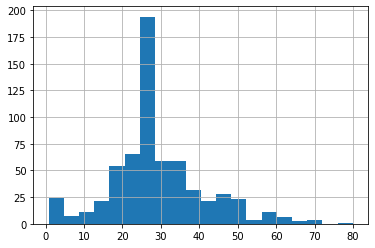

In [10]:
dftrain.age.hist(bins=20);

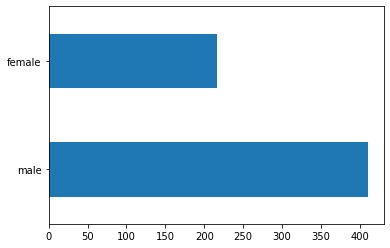

In [11]:
dftrain.sex.value_counts().plot(kind='barh')

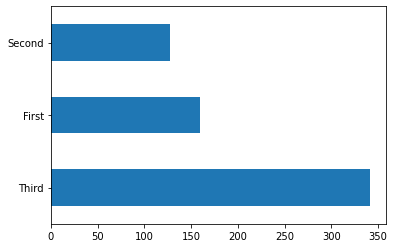

In [12]:
dftrain['class'].value_counts().plot(kind='barh');

Text(0.5, 0, '% survive')

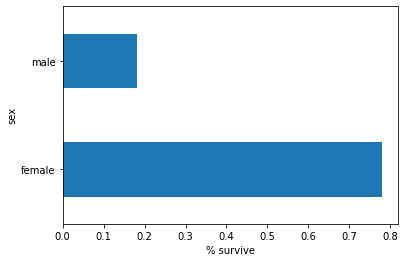

In [13]:
 pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [14]:
dfeval.shape  #testing dataset

(264, 9)

## Create categorical and numerical columns:

In [15]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare'] 

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [16]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [17]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print()
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A batch of class: [b'Third' b'First' b'Third' b'First' b'Third' b'Third' b'Third' b'Second'
 b'First' b'First']

A batch of Labels: [1 1 0 1 1 1 0 1 1 0]


In [18]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()

array([[19.],
       [27.],
       [41.],
       [35.],
       [44.],
       [35.],
       [33.],
       [29.],
       [35.],
       [36.]], dtype=float32)

In [19]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [20]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.6666667, 'accuracy_baseline': 0.625, 'auc': 0.796082, 'auc_precision_recall': 0.718633, 'average_loss': 0.8274337, 'label/mean': 0.375, 'loss': 0.8403394, 'precision': 0.5345912, 'prediction/mean': 0.6497422, 'recall': 0.85858583, 'global_step': 200}


In [21]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

In [22]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.84937245, 'auc_precision_recall': 0.7883641, 'average_loss': 0.4622459, 'label/mean': 0.375, 'loss': 0.45303705, 'precision': 0.70526314, 'prediction/mean': 0.37542695, 'recall': 0.67676765, 'global_step': 200}


In [23]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7689394, 'accuracy_baseline': 0.625, 'auc': 0.84328127, 'auc_precision_recall': 0.78695714, 'average_loss': 0.47672617, 'label/mean': 0.375, 'loss': 0.46862093, 'precision': 0.7209302, 'prediction/mean': 0.35787842, 'recall': 0.6262626, 'global_step': 200}


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpea38da_9/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


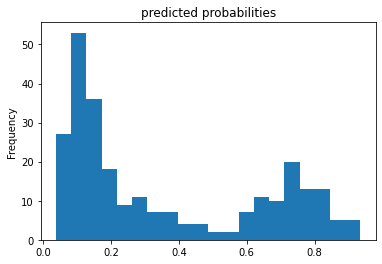

In [25]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

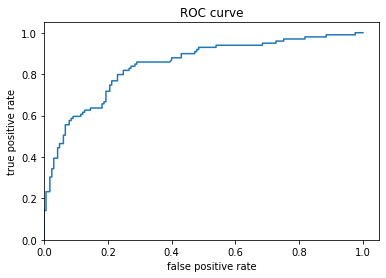

In [26]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)